# DEPLOY DE MODELOS

## Introducción

---

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M7/CLASE_52_Deploy_Modelos/Presentacion/img/M7_CLASE_52_intro.png" align="center" />

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M7/CLASE_52_Deploy_Modelos/Presentacion/img/M7_CLASE_52_pipe.png" align="center" />

El **deployment** de un modelo de machine learning simplemente significa la **integración del modelo en un entorno de producción existente** que puede tomar una entrada y devolver una salida útil para tomar decisiones comerciales prácticas.


Pickle, Shelve y Flask son las herramientas que vamos a presentar en esta clase para hacer el deploy de modelos de machine learninng

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M7/CLASE_52_Deploy_Modelos/Presentacion/img/M7_CLASE_52_objetivos.png" align="center" />


<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M7/CLASE_52_Deploy_Modelos/Presentacion/img/M7_CLASE_52_perfiles.png" align="center" />

## Serialización

---

En algunas circunstancias nos encontramos con la necesidad de enviar un objeto python de un programa a otro, o a otra computadora, o **guardarlo** para utilizarlo en algún otro momento o ir **grabando sus diferentes estados**.

Existen diferentes soluciones para realizar estas acciones, y dependen del tipo de objeto que se quiera enviar o guardar.

Por ejemplo: si tenemos un texto, lo podemos representar en formato json o xml, por otra parte  un dataframe de pandas se puede persistir en un csv o un excel. 

En el caso de **objetos más complicados como un modelo** de regresión lineal o un knn, ¿como podríamos representarlo?


<table><tr><td style="font-size:16px;width:50%;line-height:2;">       
La serialización es una técnica en donde se representan objetos por medio de una codificación binaria.
<br/>
Permite realizar la codificación sobre objetos y estructuras de datos.
<br/>
Es posible enviar a través de la red un objeto serializado como un conjunto de bytes para eventualmente guardarlo, cargarlo en memoria y volverlo a utilizar con la posibilidad de poder transmitirlo.</td><td><img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M7/CLASE_52_Deploy_Modelos/Presentacion/img/M7_CLASE_52_serialization.png"/></td></tr></table>    


## Pickle

---

Para serializar objetos python vamos a utilizar la librería Pickle.

Pickle es un estandar python, por lo que **no es compatible con otros lenguajes de programación**.



<table><tr><td style="font-size:16px;width:30%;line-height:2;">
<h4> ¿Qué puede serializar pickle?</h4><ul>
<li> Enteros </li>
<li> Float </li>                    
<li> Tuplas </li>
<li> Listas </li>
<li> Diccionarios </li>
<li> Conjuntos </li> 
<li> Funciones </li>
<li> Clases </li>
    <li> <b>Instancias de Clases</b> </li></ul></td><td><img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M7/CLASE_52_Deploy_Modelos/Presentacion/img/M7_CLASE_52_pickle.jpg"/></td></tr></table>    


<p style="background-color:#f76b5d;">
<b>Pickle no es seguro contra data errónea o maliciosa, se recomienda no deserializar data proveniente de fuentes desconocidas.</b>
</p>    

### Ejemplo

---

Podemos probar de guardar dos listas en dos archivos en disco: 


In [1]:
import pickle

animales = ["piton", "mono", "camello" ]
alimentos = ["vegetales", "mani", "agua"]

with open('./Data/animales.pkl', 'wb') as f_animales:
    pickle.dump(animales, f_animales)

with open('./Data/alimentos.pkl', 'wb') as f_alimentos:
    pickle.dump(alimentos, f_alimentos)
        

Si ya tenemos guardados objetos serializados y queremos levantarla de disco, lo hacemos de la siguiente manera:

In [2]:
with open('./Data/animales.pkl', 'rb') as f_animales:
    animales_from_disk = pickle.load(f_animales)
    
with open('./Data/alimentos.pkl', 'rb') as f_alimentos:
    alimentos_from_disk = pickle.load(f_alimentos)    
    
display(animales_from_disk, alimentos_from_disk)    

['piton', 'mono', 'camello']

['vegetales', 'mani', 'agua']

## Shelve

---

Otra biblioteca que podemos utilizar para serializar es Shelve

https://docs.python.org/3/library/shelve.html

El módulo Shelve extiende Pickle para proporcionar una forma de realizar la serialización más clara y sencilla, en la que podemos **acceder a la versión serializada de un objeto mediante un string asociada, a través de una estructura parecida a un diccionario**. 

Es decir, que Shelve nos permite guardar en disco **más de un objeto en el mismo archivo** y acceder a cada uno de estos objetos (ya sean listas, diccionarios, modelos entrenados, etc.) **utilizando las claves tal como si fuera un diccionario**. 


### Ejemplo

---

Podemos probar de guardar dos listas en un mismo archivo en disco y que cada lista esté identificada con una clave: 


In [3]:
import shelve

s = shelve.open("./Data/listas.db")
s["animales"] = ["piton", "mono", "camello" ]
s["alimentos"]= ["vegetales", "mani", "agua"]
s.close()

Si ya tenemos guardado una database y queremos levantarla de disco, lo hacemos de la siguiente manera:

In [4]:
s = shelve.open("./Data/listas.db")
animales = s["animales"]
alimentos = s["alimentos"]
display(animales, alimentos)

['piton', 'mono', 'camello']

['vegetales', 'mani', 'agua']

## Arquitectura de una aplicación web

---

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M7/CLASE_52_Deploy_Modelos/Presentacion/img/M7_CLASE_52_web_app_architecture_diagram.png" align="center" />

## Flask

---

¿Qué es una API?

API es el acrónimo en inglés de "interfaz de programación de aplicaciones" (Application Programming Interface), un software intermediario que permite que las aplicaciones se comuniquen entre sí. Cada vez que se usa una aplicación como Facebook, se envía un mensaje instantáneo o se mira el pronóstico del tiempo en el teléfono, se utiliza una API.


¿Qué es Flask?

Flask es una librería de Python que funciona como API, y nos permite crear aplicaciones web. 

Flask permite tomar una **función python y asociarla a una URL** a través del routing utilizando el diseño REST.

Vamos a usar Flask para crear APIs que al recibir un request con los datos de las features de una instancia puedan devolver la predicción de un modelo para esta instancia.

## Flask: recordando URL

---

¿Como hace nuestra aplicación para saber qué es lo que se está pidiendo en la solicitud? 

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M7/CLASE_51_APIs/Presentacion/img/M7_CLASE_51_url.png" align="center" />

* protocol: Indica el protocolo que será utilizado para acceder. ej HTTP, FTP, HTTPS

* host: Indica cómo encontrar en la red el servidor que tiene el recurso.

* port: Indica en qué puerto TCP/IP está escuchando el servidor

* path: Indica la ruta para localizar el recurso dentro del servidor

* query: Indica cuál es la consulta que se está realizando




Sobre este recurso se puede definir un método http:

* GET  : Solicita una representación de un recurso específico (sólo se recuperan datos).
* PUT  :  Reemplaza la representación con los datos en la petición.
* POST : El método POST se utiliza para enviar una entidad a un recurso (puede generar un cambio).
* DELETE : Borra la representación de un recurso.


## Ejemplo

---

Vamos a crear una aplicación web que exponga la función `mi_saludo` usando como url `http://localhost:5010/hola`

Puede accederse a este recurso mediante los métodos GET y POST

In [ ]:
# %pip install Flask

In [5]:
from flask import  Flask

app = Flask('my_first_webapp')

@app.route('/hola', methods=['GET', 'POST'])
def mi_saludo():
    texto = "¡Hola, mundo!"
    return texto


Iniciamos la aplicación en el puerto 5010

In [6]:
app.run(host='0.0.0.0', port = 5010)


 * Serving Flask app 'my_first_webapp'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5010
 * Running on http://10.1.1.140:5010
Press CTRL+C to quit


Abrimos en un browser esta url (GET)

http://localhost:5010/hola

Ahora bien, ¿podríamos conectar una web con los resultados de un modelo? ¡Claro que sí!

De eso hablamos cuando hablamos de hacer un **deploy** de un modelo: poder acceder a los resultados de un modelo ya ajustado, típicamente haciendo predict sobre un input ingresado.


Veamos un ejemplo práctico:

1. Usando el dataset `advertising.csv` entrenemos una regresión lineal simple para predecir el valor de la columna `Sales` a partir del valor de `TV`

2. Guardemos el modelo entrenado usan pickle o shelve

3. Creemos una aplicación web que reciba en un request los valores de TV y devuelva la predicción del valor de Sales que hace el modelo

4. Escribamos código python que consulte el valor predicho por el modelo para un valor de TV de 250 usando un web get

Aclaración: cuando hablamos de **endpoints**, hacemos referencia a la ubicación virtual (URL) de una API adonde se reciben requests de un recurso (en nuestro caso, un modelo) específico en un servidor.

In [16]:
import pandas as pd
import shelve
import pickle
import seaborn as sns
import requests
from flask import  Flask
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
data = pd.read_csv("./Data/advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


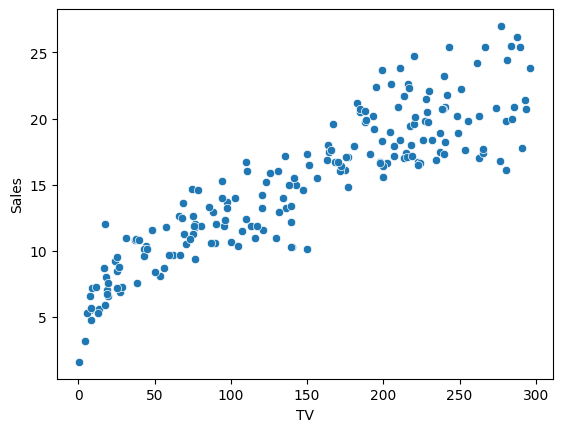

In [18]:
sns.scatterplot(data = data, x = "TV", y = "Sales");

In [19]:
#Fiteamos un modelo únicamente a partir de un dato (gasto de publicidad en TV)
y = data.Sales
X = pd.DataFrame(data.TV)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state = 127)

In [20]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)

predictions_train = model.predict(X_train)

predictions_test = model.predict(X_test)

print ('R2_train =', ' ', r2_score(y_train, predictions_train))
print ('R2_test =', ' ', r2_score(y_test, predictions_test))

print ('MSE_train =', ' ', mean_squared_error(y_train, predictions_train))
print ('MSE_test =', ' ', mean_squared_error(y_test, predictions_test))


# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto=', ' ', model.intercept_)
print ('RM = ', ' ', model.coef_)


R2_train =   0.8299212333243602
R2_test =   0.7756234104600289
MSE_train =   4.698397418772552
MSE_test =   6.302810513865884
Intercepto=   6.822179357132384
RM =    [0.05585869]


Guardamos el modelo entrenado usan shelve

In [ ]:
# s = shelve.open("./Data/handson_model.db")
# s["model"] = model
# s.close()

In [22]:
with open('./Data/modelo_prueba.pkl', 'wb') as file: 
    pickle.dump(model, file) 

Creamos una aplicación web que recibe en un request los valores de TV y devuelve la predicción del valor de Sales que hace el modelo

In [23]:
app = Flask('Modelo Prueba')

In [24]:
@app.route("/", methods=['GET'])
def hello():
    alive = "La app está viva"
    return alive

@app.route("/predict/<tv>", methods=['GET'])
def predictSales(tv):
#     s = shelve.open("../Data/handson_model.db")
#     model = s["model"]
    
    with open('./data/modelo_prueba.pkl', 'rb') as file: 
        model = pickle.load(file) 
    
    tv_df = pd.DataFrame(data = [tv], columns = ["TV"])
    prediction = model.predict(tv_df)
    # The return type must be a string, dict, tuple, Response instance, or WSGI callable
    result = {"Sales": prediction[0]}
    return result


In [25]:
app.run(host='0.0.0.0', port = 5017)

 * Serving Flask app 'Modelo Prueba'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5017
 * Running on http://192.168.0.28:5017
Press CTRL+C to quit
127.0.0.1 - - [15/Nov/2023 11:05:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Nov/2023 11:05:46] "GET /favicon.ico HTTP/1.1" 404 -


http://localhost:5017/

http://localhost:5017/predict/100

La ejecución de la celda anterior (server) no termina excepto que la detengamos explícitamente, y sólo mientras está corriendo nuestra aplicación web puede recibir y responder requests.

Por lo tanto, la ejecución de las celdas que siguen (client) debe hacerse desde otra notebook.

Escribimos código python que haga in request al server para obtener el valor predicho por el modelo para un valor de TV de 250

In [26]:
tv_value = 500
endpoint = "http://localhost:5017/predict/" + str(tv_value)
print(endpoint)
response = requests.get(endpoint)


http://localhost:5017/predict/500


ConnectionError: HTTPConnectionPool(host='localhost', port=5017): Max retries exceeded with url: /predict/500 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000230E8246340>: Failed to establish a new connection: [WinError 10061] No se puede establecer una conexión ya que el equipo de destino denegó expresamente dicha conexión'))

In [ ]:
print(response.status_code)

In [ ]:
response.json()

In [ ]:
response.json()["Sales"]

### Ejemplo 2

Dada la altura y el peso, utilizamos un clasificador gaussiano Naive Bayes para predecir la especie (perro o gato). 

A continuación, volcaremos este modelo de aprendizaje automático en un pickle. 

In [27]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("./Data/data.csv")

X = df[["Height", "Weight"]]
y = df["Species"]

clf = GaussianNB() 
clf.fit(X, y)

GaussianNB()

In [28]:
import joblib

joblib.dump(clf, "./Data/clf.pkl")

['clf.pkl']

### Front End

Creamos un archivo html denominado website.html:

Es un HTML sencillo que consiste en 2 barras de entrada, una para la altura y otra para el peso. 

Podemos notar algo extraño en la línea 16. Efectivamente {{ output }} no es una sintaxis HTML. 

Mirá lo que pasaría si ejecutaramos el HTML de arriba tal cual:

<img src="deploy1.jpg" align="center" />

Esta sintaxis {{ }} pertenece a Flask. Cuando ejecutemos este HTML con Flask más tarde, obtendremos resultados diferentes.

Algunas cosas que tendremos que tener en cuenta al codear una app en HTML con Flask:

- Necesitamos un formulario con el método = "POST" .
- Crear una carpeta en su directorio llamado "templates" y poner el archivo HTML allí para aplicaciones Flask.

### Back end

Creamos un archivo app.py con nuestra app.

- Aquí, la línea 7 es la declaración de una aplicación Flask, y la línea 14 es sólo la ejecución de la aplicación. La línea 10 es donde pondremos nuestra función principal.
<br>

- La función principal sólo debe ejecutarse si recibimos una petición POST del HTML. Podemos imponer esta condición mirando la condición request.method == "POST".
<br>

- Si recibimos una petición POST, queremos obtener los valores de las entradas. Podemos lograr esto a través del código, request.form.get("nombre"). Donde "nombre" es el nombre de las barras de entrada en el HTML. Para nuestro ejemplo, los nombres de las barras de entrada son "height" y "weight".
<br>

- Para llamar al modelo previamente entrenado, utilizamos la función joblib.load("clf.pkl").
<br>

- Para renderizar un archivo HTML con la sintaxis de Flask, utilizamos la función render_template("archivo.HTML").

Con Flask, podemos enviar una variable Python para que aparezca en un archivo HTML. Esta variable puede ser de cualquier clase, incluso un dataframe. La forma de hacerlo es especificándolo en la función render_template(). ¡Esa variable aparecerá en lugar de {{output}}!

Para correr una app de Flask:

1. Instalamos la librería (si no la tenemos ya instalada)
2. Activamos el ambiente de la materia: conda activate itba_apa_env
3. Nos movemos a la carpeta de la clase: cd ...\C13\flask
4. Ejecutamos: python run app.py
5. Nos aparecerá un mensaje "Running on http://127.0.0.1:5000", o similar. Deberemos abrir esta URL desde nuestro navegador para acceder a la app.


## Una alternativa a Flask: Streamlit

<img src="streamlit.png" align="center" width="70%"/>

In [ ]:
# !pip install streamlit

Streamlit es una librería lanzada en 2019 con el objetivo de facilitar el trabajo de los científicos de datos al momento de desarrollar una aplicación web en la que se pueda interactuar con los resultados de un modelo.

Se puede desarrollar una app de forma rápida desde Python puro, sin necesidad de recurrir a HTML o CSS.

De forma similar a como hacíamos con Flask, necesitamos un archivo .py que funcionará a modo de server. En este caso, podremos prescindir de los archivos HTML, ya que Streamlit se encarga de hacer el render de la página.

Para correr una app de Streamlit:

1. Instalamos la librería (si no la tenemos ya instalada)
2. Activamos el ambiente de la materia: conda activate itba_apa_env
3. Nos movemos a la carpeta de la clase: cd ...\C13\streamlit
4. Ejecutamos: streamlit run app.py

Esto automáticamente abrirá una pestaña en nuestro browser con la app.
<br><br>


En su forma más básica:

In [ ]:
# Imports
import streamlit as st
# Write a page title
st.title('Hello World. This is a Title')

Con más texto:

In [ ]:
# Imports
import streamlit as st
# Write a page title
st.title('Hello World. This is a Title')

# Subheader
st.subheader(‘Here, a subheader’)

# Text
st.text(‘Lorem ipsum dolor sit amet, consectetur adipiscing elit. Etiam eget ligula eu lectus lobortis condimentum.’)
# Using st.write
st.write(‘This is can be used for text and other features.’)

Agregando imágenes, un mapa, gadgets y una barra vertical:

In [ ]:
import streamlit as st
from PIL import Image

#Insert a picture
# First, read it with PIL
st.text('Imagen')
image = Image.open('chuck.jpg')
# Load Image in the App
st.image(image)


import seaborn as sns
import numpy as np
import pandas as pd

# Load the Dataset
df = sns.load_dataset('tips')

# Add Lat Long
latlong = {'NY': {'lat': 40.730610, 'lon': -73.935242},
           'London': {'lat': 51.509865,'lon': -0.118092},
           'Paris': {'lat': 48.864716, 'lon':2.349014},
           'Sao Paulo': {'lat': -23.533773,'lon': -46.625290},
           'Rome': {'lat': 41.902782,'lon': 12.496366}
           }

city = ['Paris', 'London', 'NY', 'Sao Paulo', 'Rome']
city_random = np.random.choice(city, 244)

# Add Cols
df['city'] = city_random
df['lat'] = [latlong[city]['lat'] for city in city_random]
df['lon'] = [latlong[city]['lon'] for city in city_random]

# Map
st.text("")
st.text('Mapa')
map_df = df[['lat', 'lon']]
st.map(map_df, zoom=1)

st.text("")
st.text('Radio Button')
st.radio('Choose your option', options=('Option 1', 'Option 2', 'Option 3'))
         
# Slider
st.text("")
st.text('Slider')
st.slider('<-- Slide to the sides -->', min_value=0, max_value=10, value=5, step=1)

# Multiselect
st.text("")
st.text('Multiselect')
st.multiselect('What are your favorite colors',
            ['Green', 'Yellow', 'Red', 'Blue'],
            ['Blue', 'Green']) #pre-selected

# Selectbox
st.text("")
st.text('Select box')
st.selectbox('Select Box',options=('Option 1', 'Option 2', 'Option 3'))

# text input
st.text("")
st.text('Text input')
title = st.text_input('My App Text Input', 'Write Something...')
st.write('You wrote:  ', title)

# Adding a text in the sidebar
st.sidebar.text('Ejemplo de sidebar')
# Add a radio button
st.sidebar.radio('label', options=[])

¡Ver ejemplo de una app completa en app_completa.py!

Algunos ejemplos de cosas que se pueden hacer con Streamlit: https://streamlit.io/gallery

## Ahora sí, el momento de hacer deploy

Ya tenemos nuestra app desarrollada y funcionando. Ahora bien, ¿cómo podemos subirla a un servicio web para que pueda ser consultada por cualquiera?

Existen diferentes alternativas gratuitas que pueden utilizar. Veamos dos: el servicio de hosting de Streamlit y Spaces de HuggingFace.

Si tenemos una app desarrollada en Streamlit, lo más conveniente es utilizar Cloud de la misma librería (https://streamlit.io/cloud). Este servicio requiere que tengamos creado un repositorio en GitHub (https://github.com/).

<img src="github.jpg" align="center" width="60%"/>


Un paso previo a hacer deploy, necesario tanto para Streamlit como para Spaces, es volcar en un archivo **requirements.txt** los paquetes utilizados por nuestro proyecto. Para ello existen dos alternativas:
- Opción 1. Desde una terminal Anaconda, activar el ambiente, ubicarse en la carpeta del proyecto, y ejecutar el comando: 
<br>

pip freeze > requirements.txt

Esto generara un archivo txt con todos los paquetes utilizados por nuestro ambiente, con su respectivas versiones. Tener en cuenta que es conveniente borrar de este txt de líneas que hacen referencia a un archivo puntual. Por ej:
<br>

anyio @ file:///C:/ci/anyio_1644463701441/work/dist

- Opción 2 (mejor). Utilizar el paquete pipreqs. Este paquete analiza los archivos .py en una carpeta para armar por nosotros el archivo requirements con los paquetes y versiones utilizados. Esta opción es preferible porque solo indicamos los paquetes específicos de un proyecto puntual, siendo que es probable que no utilicemos la mayoría de los paquetes instalados en nuestro ambiente. Tener en cuenta que si en nuestro script levantamos un modelo preentrenado, por ej., con Scikit-Learn, deberemos agregar manualmente este paquete, para que luego podamos hacer deploy de la app en una nube.

Para generar el archivo requirements.txt con pipreqs: abrimos una terminal Anaconda, activamos el ambiente, nos ubicamos en la carpeta del proyecto, y ejecutar el comando pipreqs.

In [ ]:
# pip install pipreqs

En total tendremos que realizar tres tareas:
1. Crear un repositorio en GitHub
2. Clonar el repositorio en nuestra PC y mover los archivos de la app en la carpeta asociada al repositorio.
3. Crear una app en Streamlit, vinculada con el repositorio en GitHub.

### 1ra parte: crear repositorio en GitHub

Los pasos que debemos seguir para crear un repositorio de GitHub:
1. Crear una cuenta en github.com
2. En pestaña "Repositories", clickear en "New"

<img src="github2.jpg" align="center" width="100%"/>
<br>

3. Elegir un nombre para el repositorio. Clickear la opción "Add a README file".
<img src="github3.jpg" align="center" width="70%"/>

4. Clickear en "Create Repository"

### 2da parte: clonar repositorio en PC

Una vez creado el repositorio, debemos clonarlo en nuestra PC. Para ello seguiremos los siguientes pasos:

1. Descargamos e instalamos el Cliente de GitHub (https://desktop.github.com/). No utilizaremos el Cliente directamente, pero esto agregará al path los comandos que utilizaremos directamente desde una terminal (puede ser desde el sistema operativo o un Anaconda prompt).
<br>

2. Desde una terminal nos movemos a la carpeta streamlit en la carpeta de la clase: cd ...\C13\streamlit
<br>

3. Ejecutamos el comando:
git clone https://github.com/nombre_usuario/nombre_repositorio. Recomendamos como nombre de repositorio "itba-apa-gh".

reemplazando nombre_usuario y nombre_repositorio por nuestros datos. Esto creará una carpeta con el nombre de nuestro repositorio en la carpeta streamlit.

4. Movemos el contenido de la carpeta "Archivos para repositorio Github" a la carpeta recién creada en nuestra PC.
<br>

5. Desde la terminal, nos vemos a la carpeta recién creada: cd ..\C13\streamlit\nombre_repositorio
<br>

6. Ejecutamos los comandos:
<br>
git add .
<br>
git commit -m "Primer commit"
<br>
git push
<br>

Debería aparecer un mensaje indicando la subida de los archivos que movimos a la carpeta.

Desde Github, podemos verificar que se hayan subido dichos archivos.

También podemos realizar la operación inversa, para actualizar los archivos en nuestra PC a partir de cambios en el repositorio en la Web. Para ello utilizamos el comando:
<br>

git pull



### 3ra parte: crear app en Streamlit

Por último tendremos que crear una app en Streamlit y vincularla con nuestro repositorio en GitHub. Para ello:

1. Creamos una cuenta en https://streamlit.io/cloud
<br>

2. Vamos a https://share.streamlit.io/ y clickeamos "New app"

<img src="streamlit2.png" align="center" width="70%"/>
<br>

3. Completamos la ruta de nuestro repositorio en GitHub y el nombre de nuestra app (es decir, el ejecutable .py con la app). Luego clickeamos en "Deploy!"

<img src="streamlit3.png" align="center" width="70%"/>
<br>

4. ¡Listo! Desde https://share.streamlit.io/ veremos el nombre de nuestra app. Al hacer click podremos acceder a la misma. Por ej: https://share.streamlit.io/app/itba-apa-gh/

### Variante con Spaces de HuggingFace y Docker

<img src="hf.png" align="center" width="20%"/>
<img src="spaces.png" align="center" width="70%"/>

Otra opción es para hacer deploy de modelos de forma gratuita es con el servicio de Nube de HuggingFace, llamado Spaces. También tenemos la opción de subir un modelo en Streamlit, pero ahora veremos como subir una app con **Docker**.
<br>

<img src="docker.png" align="center" width="30%"/>

¿Qué es Docker?

Según Wikipedia, "Docker es un proyecto de código abierto que automatiza el despliegue de aplicaciones dentro de contenedores de software, proporcionando una capa adicional de abstracción y automatización de virtualización de aplicaciones en múltiples sistemas operativos.". En otras palabras, **es un contenedor**, lo que nos permite virtualizar un entorno y un sistema operativo determinado, de forma tal de encapsular todo lo que ocurre en nuestra app, para así asegurarnos que siempre funcione correctamente.
<br>

Si queremos utilizar Flask (u otro paquete similar, llamado FastAPI) para desarrollar nuestra app de ML, una buena opción es utilizar el servicio Spaces de HuggingFace, con la opción Docker.
Simplemente deberemos seleccionar la opción Docker al momento de crear un nuevo Space:

<img src="spaces2.png" align="center" width="30%"/>

¿Cómo funciona Spaces? (https://huggingface.co/spaces). De forma muy similar a GitHub. Es, de hecho, un repositorio, y nos podemos comunicar con él a través del lenguaje Git, el mismo utilizado por GitHub y GitLab.

La particularidad de trabajar con Docker es que deberemos incluir un archivo de tipo Dockerfile (se llama "Dockerfile", sin extensión), que contendrá la información necesaria para que nuestro contenedor funcione autónomamente:

<img src="spaces3.png" align="center" width="60%"/>

Este archivo es muy sencillo, y podemos utilizar el siguiente modelo de referencia:

La conexión con nuestro repositorio será idéntica a la mostrada en el caso Streamlit/GitHub.
Tendrán que ir a carpeta ..\C13\flask, clonar el repositorio creado en Spaces (el nombre recomendado es itba-apa-flask), y copiar los archivos de la carpeta "Archivos para repositorio Spaces". Finalmente, tendrán que hacer add, commit y push, para subir los archivos del modelo.
<br>

Si todo sale bien, deberían ver la app funcionando al hacer click en "App":

<img src="spaces4.png" align="center" width="100%"/>

**Atención**: tener en cuenta que al hacer deploy con Flask previamente deberemos instalar la librería **Gunicorn**.

In [ ]:
# pip install gunicorn

## BIBLIOGRAFÍA


<a href="https://docs.python.org/3/library/shelve.html" target="_blank">Shelve</a>

<a href="https://docs.python.org/3/library/pickle.html" target="_blank">Pickle</a>

<a href="https://flask.palletsprojects.com/en/2.0.x/" target="_blank">Flask</a>

<a href="https://www.youtube.com/watch?v=9J1nJOivdyw" target="_blank">Web Server Concepts and Examples</a>

<a href="https://medium.com/gustavorsantos/streamlit-basics-build-your-first-web-app-ffd377a85666" target="_blank">Streamlit Basics</a>

https://towardsdatascience.com/building-a-machine-learning-web-application-using-flask-29fa9ea11dac

